<a href="https://colab.research.google.com/github/hallinearaujo/array_girls/blob/main/pr%C3%A1tica_com_CIFAR_para_explora%C3%A7%C3%A3o_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Author: Halline Araújo
#prática do CIFAR - exploração de dados
#carregando o conjunto de dados usando uma biblioteca de aprendizado profundo chamada CIFAR - 10Keras
#base de dados não estruturados, utilizada para resolver problemas mais complexos com mais de 60 mil imagens variadas (carros, animais, objetos, etc.)
#vamos aplicar o PCA nessa base transformando os 60.000 dados com 3000 campos reduzindo a dimensionalidade para 99 campos para então aplicar o algoritmo

In [2]:
#keras é um framework para trabalhar com deep learning
from keras.datasets import cifar10

In [4]:
#carregar os dados para dentro das variáveis
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [5]:
#imprimindo rapidamente a forma das imagens de treinamento e teste
print('Traning data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)

Traning data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [6]:
y_train.shape,y_test.shape

((50000, 1), (10000, 1))

In [7]:
#mostra quantidade de informações únicas dentro dessa base de dados
import numpy as np

# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
#cria um dicionário para nomear esses casos
label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}


Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')


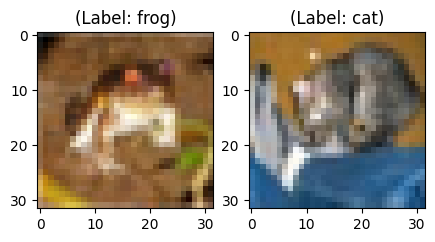

In [11]:
#aplicar o treinamento e plotar a imagem
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_train[0][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_test[0][0]]) + ")"))

In [12]:
#verificando rapidamente os valores max e min das imagens normalizadas normalizando também os pixels entre 0 e 1
np.min(x_train),np.max(x_train)

(0, 255)

In [13]:
x_train = x_train/255.0

In [14]:
np.min(x_train),np.max(x_train)

(0.0, 1.0)

In [15]:
x_train.shape

(50000, 32, 32, 3)

In [16]:
#criando um dataframe que manterá os valores de pixel das imagens junto com seus respectivos rótulos em um formato de linha e coluna
x_train_flat = x_train.reshape(-1,3072)

In [17]:
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]

In [18]:
import pandas as pd

df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)

In [20]:
#identificando o tamanho do dataframe após normalização
df_cifar['label'] = y_train
print('Size of the dataframe: {}'.format(df_cifar.shape))

Size of the dataframe: (50000, 3073)


In [21]:
#a PCA será aplicada em todas as colunas exceto na última que é o rótulo de cada imagem
df_cifar.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313725,1


In [22]:
#importanto o PCA 
from sklearn.decomposition import PCA

In [23]:
#aplicando o tratamento
pca_cifar = PCA(n_components=2)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

In [24]:
principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2'])
principal_cifar_Df['y'] = y_train

In [25]:
principal_cifar_Df.head()

,principal component 1,principal component 2,y
0,-6.401018,2.729039,6
1,0.829783,-0.949943,9
2,7.730200,-11.522102,9
3,-10.347817,0.010738,4
4,-2.625651,-4.969240,1


In [26]:
print('Explained variation per principal component: {}'.format(pca_cifar.explained_variance_ratio_))

Explained variation per principal component: [0.2907663  0.11253144]


<Axes: xlabel='principal component 1', ylabel='principal component 2'>

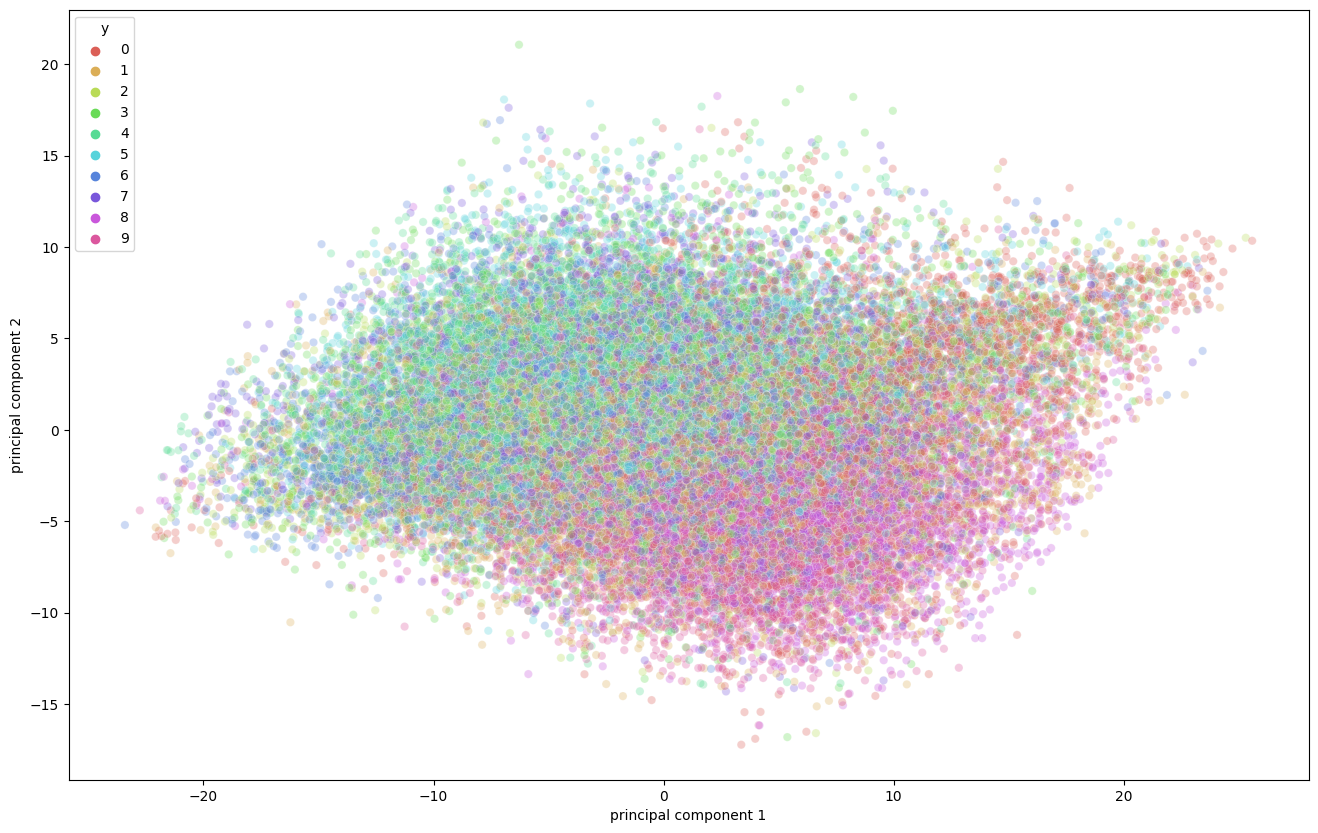

In [27]:
#visualizando os dados do CIFAR dentro de um espaço bidimensional
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)

In [28]:
x_test = x_test/255.0

In [29]:
#faz o reshape
x_test = x_test.reshape(-1,32,32,3)

In [30]:
x_test_flat = x_test.reshape(-1,3072)

In [31]:
#passando quantas variações desejada pela captura do PCA, para garantir a boa variabilidade dos dados, nesse exemplo 90%
pca = PCA(0.9)

In [32]:
pca.fit(x_train_flat)

PCA(n_components=0.9)

In [33]:
PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=0.9)

In [34]:
pca.n_components_

99

In [35]:
train_img_pca = pca.transform(x_train_flat)
test_img_pca = pca.transform(x_test_flat)

In [36]:
#import das bibliotecas; esses frameworks abstraem a complexidade da execução de uma rede neural
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.optimizers import RMSprop

In [37]:
#treinar e testar os objetos tipo numpy
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [38]:
#20processamentos executados dentro da rede neural 
batch_size = 128 #tamanho do batch
num_classes = 10 #numero de classes
epochs = 20

In [39]:
#adiciona camadas
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(99,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


In [40]:
#mostra o sumário do modelo com as caracteristicas
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              102400    
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1,810,698
Trainable params: 1,810,698
Non-trainable params: 0
_________________________________________________________________


In [41]:
#treinamento do modelo com os parâmetros que foram incluídos
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(train_img_pca, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(test_img_pca, y_test))

Epoch 1/20
391/391 [==============================] - 24s 57ms/step - loss: 1.6310 - accuracy: 0.4223 - val_loss: 1.4560 - val_accuracy: 0.4835
Epoch 2/20
391/391 [==============================] - 21s 55ms/step - loss: 1.3179 - accuracy: 0.5316 - val_loss: 1.3297 - val_accuracy: 0.5297
Epoch 3/20
391/391 [==============================] - 22s 57ms/step - loss: 1.1360 - accuracy: 0.5946 - val_loss: 1.2954 - val_accuracy: 0.5494
Epoch 4/20
391/391 [==============================] - 22s 56ms/step - loss: 0.9848 - accuracy: 0.6481 - val_loss: 1.3029 - val_accuracy: 0.5615
Epoch 5/20
391/391 [==============================] - 21s 53ms/step - loss: 0.8349 - accuracy: 0.6995 - val_loss: 1.4600 - val_accuracy: 0.5468
Epoch 6/20
391/391 [==============================] - 21s 54ms/step - loss: 0.6991 - accuracy: 0.7490 - val_loss: 1.4295 - val_accuracy: 0.5682
Epoch 7/20
391/391 [==============================] - 23s 59ms/step - loss: 0.5757 - accuracy: 0.7939 - val_loss: 1.5607 - val_accuracy:

In [42]:
#agora sem o PCA
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_flat, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(x_test_flat, y_test))

Epoch 1/20
391/391 [==============================] - 44s 110ms/step - loss: 2.1593 - accuracy: 0.2397 - val_loss: 1.8822 - val_accuracy: 0.3209
Epoch 2/20
391/391 [==============================] - 45s 114ms/step - loss: 1.8336 - accuracy: 0.3400 - val_loss: 1.7785 - val_accuracy: 0.3550
Epoch 3/20
219/391 [===============>..............] - ETA: 18s - loss: 1.7551 - accuracy: 0.3689

KeyboardInterrupt: ignored